### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### Git Hub link 

#### 1. Import the necessary packages - 2.5 marks

In [2]:
#importing all the libraries.
#importing pandas
import pandas as pd
#importing numpy for numerical calculations
import numpy as np
#importing matplolib.pyplot (this also is a dependency for seaborn)
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sns
#setting the attribute color_codes to true
sns.set(color_codes = True)
#setting the style to darkgrid
sns.set_style(style = 'darkgrid')

#enabling multiple parameters output.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#setting the float display format.
pd.options.display.float_format = '{:.2f}'.format

#setting the width fo the notebook to 98%
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:98% !important;}</style>"))

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
#reading the csv's to individual dataframes.
#assumptions : 
    #it is assumed that the three csv's will be in teh same directory as that of the ipython notebook.
#loading the data csv file
data_orig = pd.read_csv('data.csv')

#loading the item csv file
item_orig = pd.read_csv('item.csv')

#loading the user csv file
user_orig = pd.read_csv('user.csv')

In [4]:
#Getting the copy fo the data frame
data = data_orig.copy()
item = item_orig.copy()
user = user_orig.copy()

###### Top five rows of the dataset

In [5]:
data.head()
item.head()
user.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

##### shape of the datasets

In [6]:
#getting the shape of the datasets 
data.shape
#(100000, 4) we have 4 columns.
#--------------------------------------------------------------------------------
item.shape
#(1681, 22) we have 22 columns.
#--------------------------------------------------------------------------------

user.shape
#(943, 5) we have 5 columns.
#--------------------------------------------------------------------------------

(100000, 4)

(1681, 22)

(943, 5)

##### Information about the dataset

In [7]:
#getting the details of the data datatypes
data.info()

#getting the details of the datatypes for item 
item.info()

#getting the details of the datatypes for user
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

##### Describe the dataset

In [8]:
#Describe the dataset
data.describe()

item.describe()

user.describe().T

,user id,movie id,rating,timestamp
count,100000.00,100000.00,100000.00,100000.00
mean,462.48,425.53,3.53,883528851.49
std,266.61,330.80,1.13,5343856.19
min,1.00,1.00,1.00,874724710.00
25%,254.00,175.00,3.00,879448709.50
50%,447.00,322.00,4.00,882826944.00
75%,682.00,631.00,4.00,888259984.00
max,943.00,1682.00,5.00,893286638.00


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00
mean,841.84,0.00,0.15,0.08,0.02,0.07,0.30,0.06,0.03,0.43,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,0.02,0.36,0.27,0.16,0.26,0.46,0.25,0.17,0.50,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1262.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1682.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,count,mean,std,min,25%,50%,75%,max
user id,943.00,472.00,272.36,1.00,236.50,472.00,707.50,943.00
age,943.00,34.05,12.19,7.00,25.00,31.00,43.00,73.00


##### Calculating the null values if any

In [9]:
#for data dataset.
data.isna().any()

#for item dataset
item.isnull().any()

#for user dataset 
user.isnull().any()

user id      False
movie id     False
rating       False
timestamp    False
dtype: bool

movie id        False
movie title     False
release date    False
unknown         False
Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
dtype: bool

user id       False
age           False
gender        False
occupation    False
zip code      False
dtype: bool

#### 4. Find the number of movies per genre using the item data - 5 marks

In [10]:
# use sum on the default axis

#make a copy of the dataframe
itemcopy = item.copy()

#drop the columns : 'movie id , movie title and release date'
#itemcopy.drop(['movie id','movie title','release date'], axis = 1, inplace = True)
#get the value count of all the genres 
itemcopy[itemcopy.columns.difference(['movie id','movie title','release date'])].apply(np.sum)

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
unknown          1
dtype: int64

##### Plotting the number of movies per genre

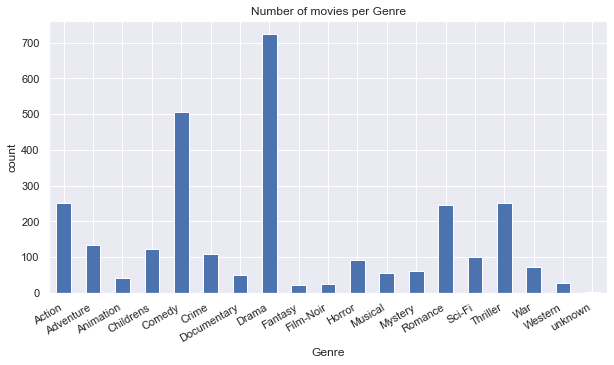

In [11]:
#plotting the sum of values in a graph.
fig,ax = plt.subplots(figsize= (10, 5));

ax = itemcopy[itemcopy.columns.difference(['movie id','movie title','release date'])].apply(np.sum).plot(kind = 'bar')
ax.set_xlabel('Genre')
ax.set_ylabel('count')
ax.set_title('Number of movies per Genre')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, horizontalalignment='right');

#### 5. Find the movies that have more than one genre - 2.5 marks

In [12]:
#hint: use sum on the axis = 1

# get the dataframe with columsn movieid and release data excluded
#set the movie title as teh index for teh resultant dataframe
items_with_moviename = itemcopy[itemcopy.columns.difference(['movie id','release date'])].set_index('movie title')

#use the above dataframe to get the list of movies with more than 1 genre.
items_with_moviename[items_with_moviename.sum(axis = 1) > 1].index

Index(['Toy Story ', 'GoldenEye ', 'Get Shorty ', 'Copycat ',
       'Twelve Monkeys ', 'Babe ', 'Richard III ', 'Seven (Se7en) ',
       'Usual Suspects, The ', 'Postino, Il ',
       ...
       'Favor, The ', 'Little City ', 'Target ', 'Rough Magic ',
       'Nothing Personal ', 'MURDER and murder ', 'Tainted ', 'Mirage ',
       'B. Monkey ', 'Sliding Doors '],
      dtype='object', name='movie title', length=849)

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [13]:
#Dropping the rows containing the unknown genre implace
itemcopy.drop(itemcopy[itemcopy['unknown'] == 1].index, axis = 0, inplace = True)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [14]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [15]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [17]:
#your answers here
#Answers below.

##### Plot for age , gender and occupation using user dataset

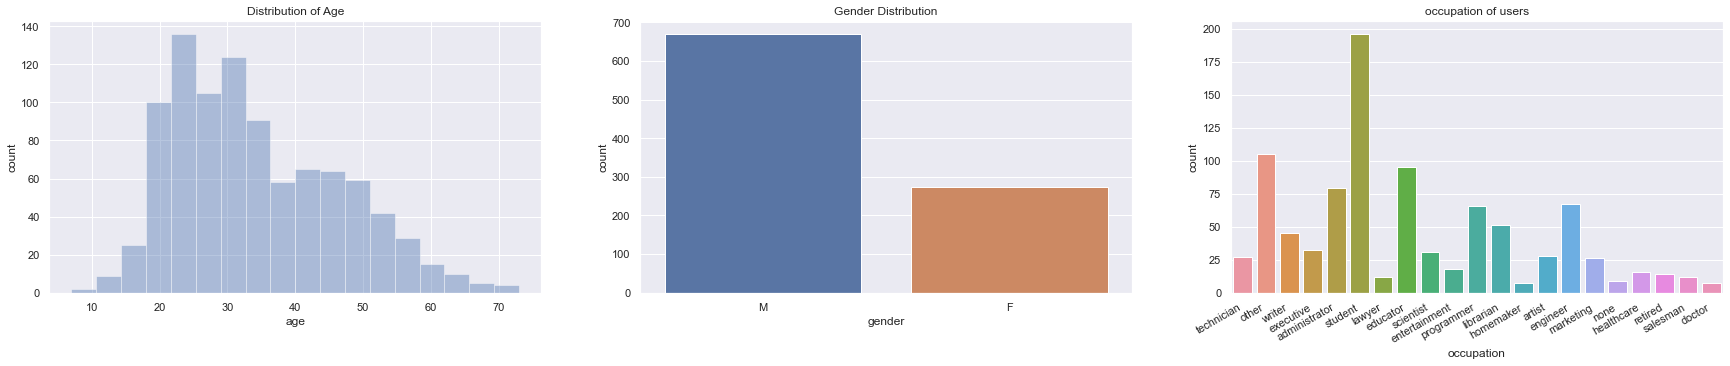

In [18]:
fig, ax = plt.subplots(figsize = (30, 5), ncols = 3, nrows = 1)
sns.distplot(user['age'], kde = False, ax = ax[0])
ax[0].set_ylabel('count');
ax[0].set_title('Distribution of Age')
sns.countplot(user['gender'], ax = ax[1])
ax[1].set_title('Gender Distribution')
sns.countplot(user['occupation'], ax = ax[2])
ax[2].set_title('occupation of users')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation = 30, horizontalalignment = 'right');

##### Plot for rating and release year

Text(0.5, 1.0, 'Distribution plot for release year')

Text(0.5, 1.0, 'Countplot for rating')

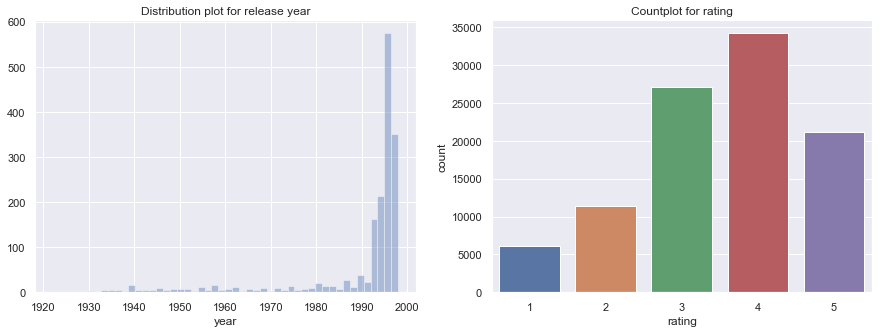

In [19]:
#to plot the graph for relase year, we can use the itemcopy dataset itself.
itemyear = itemcopy.copy()
itemyear['year'] = itemyear['release date'].str.split('-',  expand = True)[2] 

itemyear['year']= itemyear['year'].astype('int32')

fig, ax = plt.subplots(figsize = (15, 5), ncols = 2, nrows = 1)
sns.distplot(itemyear['year'], kde = False , ax = ax[0])
ax[0].set_title('Distribution plot for release year')
sns.countplot(data['rating'], ax = ax[1])
ax[1].set_title('Countplot for rating')

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [20]:
#Your answer here
#answers below


In [21]:
# we will need the release year and the genre of the movie. both of them are present in teh item dataframe. 
# I can start with the item dataframe and if I require more data , i will add in more data.

#Exclude the movie id , movie title and unknown genre from the dataframe.
itemwithoutmovienameid = item[item.columns.difference(['movie id', 'movie title', 'unknown'])].copy()

#check the columns and null values.
itemwithoutmovienameid.columns
itemwithoutmovienameid.isnull().any()    #---->No null values observed

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release date'],
      dtype='object')

Action          False
Adventure       False
Animation       False
Childrens       False
Comedy          False
Crime           False
Documentary     False
Drama           False
Fantasy         False
Film-Noir       False
Horror          False
Musical         False
Mystery         False
Romance         False
Sci-Fi          False
Thriller        False
War             False
Western         False
release date    False
dtype: bool

In [22]:
#get sample of the release date
itemwithoutmovienameid['release date'][:2]

0    01-Jan-1995
1    01-Jan-1995
Name: release date, dtype: object

In [23]:
#create new column with the year
itemwithoutmovienameid.loc[:, 'year'] = itemwithoutmovienameid.loc[:, 'release date'].str.split('-', expand = True )[2]

#convert the column created into numbers 
itemwithoutmovienameid.loc[:, 'year'] = itemwithoutmovienameid['year'].astype('int32')

##### change the index of the itemwithoutmovienameid to year

In [24]:
#drop the release year column now.
itemwithoutmovienameid.drop(['release date'], axis = 1, inplace = True)
itemwithoutmovienameid.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


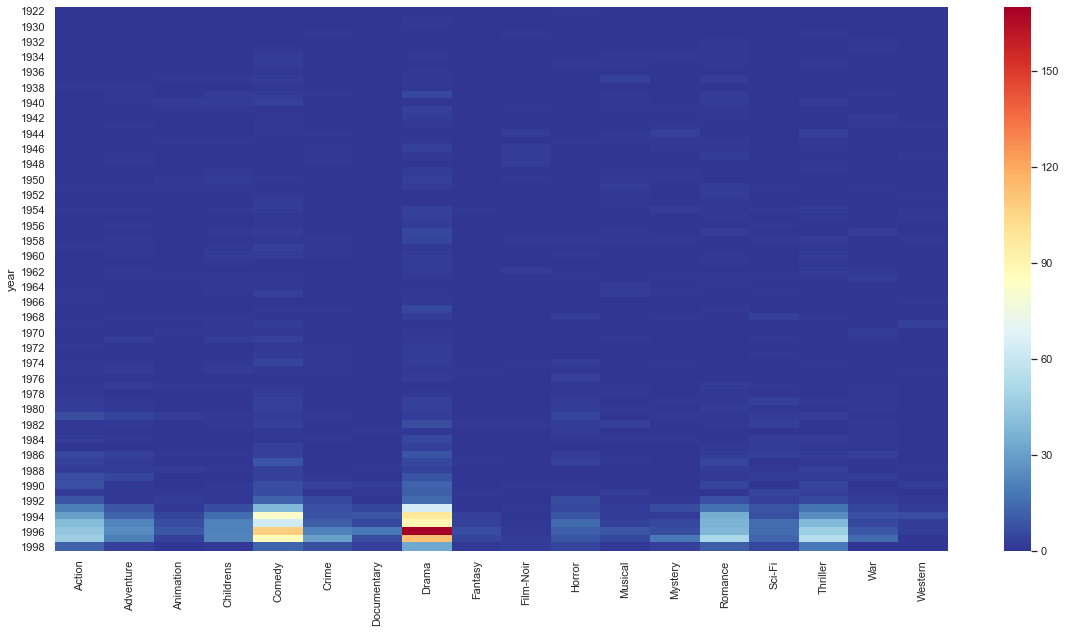

In [25]:
fig, ax = plt.subplots(figsize = (20, 10))

sns.heatmap(itemwithoutmovienameid.groupby(['year']).sum(), cmap = 'RdYlBu_r', ax = ax)

### Observations:

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [27]:
#your answer here
#answers below

In [28]:
#we combine the item and data dataset
#joining the dataset(data and itemcopy ) by merge on movie id
dataitem = pd.merge(data, itemcopy, on = 'movie id', how = 'outer')

In [29]:
moviewithmorethan100ratings = dataitem.groupby(['movie title'])['rating'].count() > 100

moviewithmorethan100ratings = moviewithmorethan100ratings.reset_index()

In [31]:
movieidlist = moviewithmorethan100ratings.loc[moviewithmorethan100ratings['rating']]['movie title']

In [32]:
moviemorethan100rating = dataitem[dataitem['movie title'].isin(movieidlist)]

moviewithrating = moviemorethan100rating.groupby(['movie title'])['rating'].mean().reset_index().rename({'rating':'avgrating'}, axis = 1)

moviewithrating

,movie title,avgrating
0,101 Dalmatians,2.91
1,12 Angry Men,4.34
2,2001: A Space Odyssey,3.97
3,Absolute Power,3.37
4,"Abyss, The",3.59
...,...,...
329,Willy Wonka and the Chocolate Factory,3.63
330,"Wizard of Oz, The",4.08
331,"Wrong Trousers, The",4.47
332,Young Frankenstein,3.94


In [33]:
#we get the movie name and the avgrating as follows.

moviewithrating.sort_values('avgrating', ascending = False).reset_index(drop = True)[:25]

,movie title,avgrating
0,"Close Shave, A",4.49
1,Schindler's List,4.47
2,"Wrong Trousers, The",4.47
3,Casablanca,4.46
4,"Shawshank Redemption, The",4.45
5,Rear Window,4.39
6,"Usual Suspects, The",4.39
7,Star Wars,4.36
8,12 Angry Men,4.34
9,Citizen Kane,4.29


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [34]:
#combine all the dataset.
dataitemuser = pd.merge(dataitem, user, on = 'user id', how = 'outer')

In [35]:
dataitemuser.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'age', 'gender', 'occupation',
       'zip code'],
      dtype='object')

In [36]:
databygender = dataitemuser.groupby('gender')[['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
                               'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'age', 'gender', 'occupation', 'zip code']].count()

In [37]:
databygender[['Drama', 'Sci-Fi', 'Romance']]

,Drama,Sci-Fi,Romance
gender,,,
F,25738,25738,25738
M,74252,74252,74252


#### Conclusion:

1. Men watch more drama than women
2. Men watch more sci - fi than women.
3. Men watch more Romance than women.